# 花粉データを「花粉データ2019（関東）.xlsx」から読み込む

In [1]:
import pandas as pd
df = pd.read_excel('assets/2019_kantou/花粉データ2019(関東).xlsx', sheet_name='時別', index=None, header=1, dtype='str')


In [2]:
# Drop no-data columns
df = df.drop(df.columns[24:26], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   年                3600 non-null   object
 1   月                3600 non-null   object
 2   日                3600 non-null   object
 3   時                3600 non-null   object
 4   水戸石川一般環境大気測定局    2875 non-null   object
 5   独立行政法人国立環境研究所    2865 non-null   object
 6   日立市消防本部          2874 non-null   object
 7   宇都宮市中央生涯学習センター   2875 non-null   object
 8   栃木県庁那須庁舎         2875 non-null   object
 9   日光市役所第４庁舎        2745 non-null   object
 10  群馬県衛生環境研究所       2875 non-null   object
 11  館林保健福祉事務所        2869 non-null   object
 12  さいたま市役所          2875 non-null   object
 13  飯能市役所            2875 non-null   object
 14  熊谷市保健センター        2875 non-null   object
 15  東邦大学             2876 non-null   object
 16  千葉県環境研究センター      2869 non-null   object
 17  印旛健康福祉センター成田支所   2875 non-null   

## ヘッダを見やすくリネーム

In [3]:
stations = []

# 20個ある観測局をとりあえず、st_nnという名称に統一
for i in range(1, 21):
    stations.append('st_{0:02d}'.format(i))

print(stations)

['st_01', 'st_02', 'st_03', 'st_04', 'st_05', 'st_06', 'st_07', 'st_08', 'st_09', 'st_10', 'st_11', 'st_12', 'st_13', 'st_14', 'st_15', 'st_16', 'st_17', 'st_18', 'st_19', 'st_20']


In [4]:
header = ['year', 'month', 'day', 'hour'] + stations
print(header)

['year', 'month', 'day', 'hour', 'st_01', 'st_02', 'st_03', 'st_04', 'st_05', 'st_06', 'st_07', 'st_08', 'st_09', 'st_10', 'st_11', 'st_12', 'st_13', 'st_14', 'st_15', 'st_16', 'st_17', 'st_18', 'st_19', 'st_20']


In [5]:
df.columns = header
df.head(1)


,year,month,day,hour,st_01,st_02,st_03,st_04,st_05,st_06,...,st_11,st_12,st_13,st_14,st_15,st_16,st_17,st_18,st_19,st_20
0,2019,2,1,1,0,-9998,0,0,4,0,...,0,-9998,-9998,-9998,-9998,0,4,0,4,0


## 日付＋HourをDatetimeに

In [6]:
df.hour.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24'], dtype=object)

In [7]:
df.hour = df.hour.astype(int)-1
df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [8]:
# hourに関して、1-24 を 0-23として登録
df['time'] = pd.to_datetime(dict(year=df.year,month=df.month,day=df.day, hour=df.hour))

In [9]:
df.head(1)

,year,month,day,hour,st_01,st_02,st_03,st_04,st_05,st_06,...,st_12,st_13,st_14,st_15,st_16,st_17,st_18,st_19,st_20,time
0,2019,2,1,0,0,-9998,0,0,4,0,...,-9998,-9998,-9998,-9998,0,4,0,4,0,2019-02-01


In [10]:
df = df.drop(df.columns[:4], axis=1)
df.head(1)

,st_01,st_02,st_03,st_04,st_05,st_06,st_07,st_08,st_09,st_10,...,st_12,st_13,st_14,st_15,st_16,st_17,st_18,st_19,st_20,time
0,0,-9998,0,0,4,0,0,0,4,4,...,-9998,-9998,-9998,-9998,0,4,0,4,0,2019-02-01


## 測定値をfloat型へ
**NANを含むため、intではうまく行かない**


In [11]:
df.iloc[:, :-1] = df.iloc[:, :-1].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   st_01   2875 non-null   float64       
 1   st_02   2865 non-null   float64       
 2   st_03   2874 non-null   float64       
 3   st_04   2875 non-null   float64       
 4   st_05   2875 non-null   float64       
 5   st_06   2745 non-null   float64       
 6   st_07   2875 non-null   float64       
 7   st_08   2869 non-null   float64       
 8   st_09   2875 non-null   float64       
 9   st_10   2875 non-null   float64       
 10  st_11   2875 non-null   float64       
 11  st_12   2876 non-null   float64       
 12  st_13   2869 non-null   float64       
 13  st_14   2875 non-null   float64       
 14  st_15   2875 non-null   float64       
 15  st_16   2875 non-null   float64       
 16  st_17   2875 non-null   float64       
 17  st_18   2875 non-null   float64       
 18  st_19   

In [12]:
df.describe()

,st_01,st_02,st_03,st_04,st_05,st_06,st_07,st_08,st_09,st_10,st_11,st_12,st_13,st_14,st_15,st_16,st_17,st_18,st_19,st_20
count,2875.000000,2865.000000,2874.000000,2875.000000,2875.000000,2745.000000,2875.000000,2869.000000,2875.000000,2875.000000,2875.000000,2876.000000,2869.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2868.000000,2875.000000
mean,43.442783,-9.779407,170.184760,76.453913,-24.781913,145.515118,46.327652,39.918090,-0.238261,26.174261,-8.321391,-7.406815,-13.009759,57.447652,-1.353391,-9.225739,51.943304,8.334609,-10.800209,42.417739
std,329.332975,529.248407,582.018026,839.941926,907.739811,921.210654,730.862655,524.952051,496.714343,783.456284,655.290516,594.485331,760.875230,799.523161,631.254592,562.056678,431.148689,421.224802,417.753845,213.794366
min,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000
25%,4.000000,4.000000,8.000000,8.000000,4.000000,4.000000,8.000000,8.000000,4.000000,4.000000,4.000000,0.000000,4.000000,12.000000,0.000000,0.000000,8.000000,4.000000,0.000000,4.000000
50%,8.000000,12.000000,28.000000,32.000000,16.000000,20.000000,41.000000,20.000000,8.000000,20.000000,12.000000,8.000000,12.000000,36.000000,12.000000,8.000000,28.000000,12.000000,4.000000,16.000000
75%,28.000000,20.000000,114.000000,94.000000,45.000000,94.000000,102.000000,53.000000,24.000000,69.000000,28.000000,20.000000,32.000000,102.000000,28.000000,20.000000,69.000000,28.000000,8.000000,41.000000
max,3890.000000,307.000000,8405.000000,5715.000000,3189.000000,14915.000000,2685.000000,2300.000000,746.000000,5473.000000,2505.000000,1307.000000,4141.000000,3681.000000,4255.000000,705.000000,9864.000000,1123.000000,373.000000,1525.000000


# 欠損値（マイナスの値）をNaNに置換

In [13]:
import numpy as np

In [14]:
df = df.replace(-9998, np.nan)
df = df.replace(-9999, np.nan)
df.describe()

,st_01,st_02,st_03,st_04,st_05,st_06,st_07,st_08,st_09,st_10,st_11,st_12,st_13,st_14,st_15,st_16,st_17,st_18,st_19,st_20
count,2873.000000,2857.000000,2872.000000,2859.000000,2852.000000,2735.000000,2861.000000,2862.000000,2868.000000,2859.000000,2863.000000,2866.000000,2853.000000,2859.000000,2864.000000,2866.000000,2871.000000,2870.000000,2863.000000,2874.000000
mean,50.432997,18.189009,177.265669,132.834208,55.647265,182.602925,95.478504,64.469252,24.163529,82.273172,33.549424,27.452198,42.987382,113.721581,37.041550,22.141661,65.945315,25.767247,6.641635,45.911273
std,195.628682,25.562714,516.629207,371.581480,147.474673,688.490171,201.242296,170.637740,51.802617,227.045817,105.024726,71.042307,140.410970,271.275763,120.764094,49.845690,212.564578,54.202718,16.210964,103.067833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,8.000000,8.000000,4.000000,4.000000,8.000000,8.000000,4.000000,4.000000,4.000000,0.000000,4.000000,12.000000,0.000000,0.000000,8.000000,4.000000,0.000000,4.000000
50%,8.000000,12.000000,28.000000,32.000000,16.000000,20.000000,41.000000,20.000000,8.000000,20.000000,12.000000,8.000000,12.000000,36.000000,12.000000,8.000000,28.000000,12.000000,4.000000,16.000000
75%,28.000000,20.000000,114.000000,94.000000,45.000000,94.000000,102.000000,53.000000,24.000000,69.000000,28.000000,20.000000,32.000000,102.000000,28.000000,20.000000,69.000000,28.000000,8.000000,41.000000
max,3890.000000,307.000000,8405.000000,5715.000000,3189.000000,14915.000000,2685.000000,2300.000000,746.000000,5473.000000,2505.000000,1307.000000,4141.000000,3681.000000,4255.000000,705.000000,9864.000000,1123.000000,373.000000,1525.000000


### カラムの順序を整理

In [15]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head(1)

,time,st_01,st_02,st_03,st_04,st_05,st_06,st_07,st_08,st_09,...,st_11,st_12,st_13,st_14,st_15,st_16,st_17,st_18,st_19,st_20
0,2019-02-01,0.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,4.0,...,0.0,NaN,NaN,NaN,NaN,0.0,4.0,0.0,4.0,0.0


In [16]:
df.describe()

,st_01,st_02,st_03,st_04,st_05,st_06,st_07,st_08,st_09,st_10,st_11,st_12,st_13,st_14,st_15,st_16,st_17,st_18,st_19,st_20
count,2873.000000,2857.000000,2872.000000,2859.000000,2852.000000,2735.000000,2861.000000,2862.000000,2868.000000,2859.000000,2863.000000,2866.000000,2853.000000,2859.000000,2864.000000,2866.000000,2871.000000,2870.000000,2863.000000,2874.000000
mean,50.432997,18.189009,177.265669,132.834208,55.647265,182.602925,95.478504,64.469252,24.163529,82.273172,33.549424,27.452198,42.987382,113.721581,37.041550,22.141661,65.945315,25.767247,6.641635,45.911273
std,195.628682,25.562714,516.629207,371.581480,147.474673,688.490171,201.242296,170.637740,51.802617,227.045817,105.024726,71.042307,140.410970,271.275763,120.764094,49.845690,212.564578,54.202718,16.210964,103.067833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,8.000000,8.000000,4.000000,4.000000,8.000000,8.000000,4.000000,4.000000,4.000000,0.000000,4.000000,12.000000,0.000000,0.000000,8.000000,4.000000,0.000000,4.000000
50%,8.000000,12.000000,28.000000,32.000000,16.000000,20.000000,41.000000,20.000000,8.000000,20.000000,12.000000,8.000000,12.000000,36.000000,12.000000,8.000000,28.000000,12.000000,4.000000,16.000000
75%,28.000000,20.000000,114.000000,94.000000,45.000000,94.000000,102.000000,53.000000,24.000000,69.000000,28.000000,20.000000,32.000000,102.000000,28.000000,20.000000,69.000000,28.000000,8.000000,41.000000
max,3890.000000,307.000000,8405.000000,5715.000000,3189.000000,14915.000000,2685.000000,2300.000000,746.000000,5473.000000,2505.000000,1307.000000,4141.000000,3681.000000,4255.000000,705.000000,9864.000000,1123.000000,373.000000,1525.000000


# ヒストグラム表示

In [17]:
import matplotlib.pyplot as plt

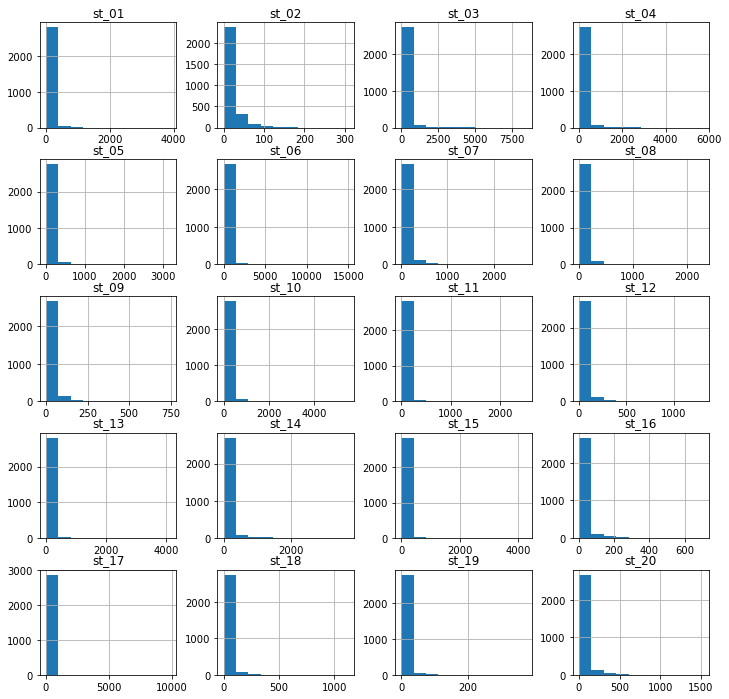

In [19]:
df.hist(figsize=(12, 12));